In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [43]:
conexion = pymysql.connect(host='localhost',
                           database='accidentes',
                           user='*usuario*',
                           passwd='*contraseña*')
                        

In [44]:
hechos = pd.read_sql(sql='SELECT * FROM aux_hechos', con=conexion)
victimas = pd.read_sql(sql='SELECT * FROM aux_victimas', con=conexion)

In [169]:
hechos

,Id,Id_hecho,N_victimas,Fecha,Año,Mes,Dia,Hora,Lugar_hecho,Tipo_calle,Calle,Cruce,Comuna,Longitud,Latitud,Participantes,Victima,Acusado
0,1,2016-0001,1,2016-01-01,2016,1,1,4,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,Piedra Buena Av.,"Fernandez De La Cruz, F., Gral. Av.",8,-58.475340,-34.687570,Moto-Auto,Moto,Auto\r
1,2,2016-0002,1,2016-01-02,2016,1,2,1,Av Gral Paz Y Av De Los Corrales,Avenida,"Paz, Gral. Av.",De Los Corrales Av.,9,-58.508775,-34.669777,Auto-Pasajeros,Auto,Pasajeros\r
2,3,2016-0003,1,2016-01-03,2016,1,3,7,Av Entre Rios 2034,Avenida,Entre Rios Av.,,1,-58.390403,-34.631894,Moto-Auto,Moto,Auto\r
3,4,2016-0004,1,2016-01-10,2016,1,10,0,Av Larrazabal Y Gral Villegas Conrado,Avenida,Larrazabal Av.,"Villegas, Conrado, Gral.",8,-58.465039,-34.680930,Moto-Sd,Moto,Sd\r
4,5,2016-0005,1,2016-01-21,2016,1,21,5,Av San Juan Y Presidente Luis Saenz Peña,Avenida,San Juan Av.,"Saenz Pe?A, Luis, Pres.",1,-58.387183,-34.622466,Moto-Pasajeros,Moto,Pasajeros\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,692,2021-0093,1,2021-12-13,2021,12,13,17,Av. Riestra Y Mom,Avenida,Riestra Av.,Mom,7,-58.433538,-34.645616,Moto-Auto,Moto,Auto\r
692,693,2021-0094,1,2021-12-20,2021,12,20,1,Au Dellepiane Y Lacarra,Autopista,"Dellepiane, Luis, Tte. Gral.",Lacarra Av.,9,-58.467398,-34.651178,Moto-Auto,Moto,Auto\r
693,694,2021-0095,1,2021-12-30,2021,12,30,0,Av. Gaona Y Terrada,Avenida,Gaona Av.,Terrada,11,-58.472934,-34.619847,Moto-Cargas,Moto,Cargas\r
694,695,2021-0096,1,2021-12-15,2021,12,15,10,Av. Eva Peron 4071,Avenida,"Peron, Eva Av.",,9,-58.470668,-34.650217,Auto-Cargas,Auto,Cargas\r


# EDA

Observamos que generalmente en los accidente hay una sola víctima, que hayan más suelen ser casos atípicos

In [170]:
hechos['N_victimas'].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_victimas, dtype: float64

### ¿Cuantos siniestros viales mortales ocurren por año?

Observamos que, del 2016 al 2021, la cantidad de siniestro viales se redujeron aproximadamente un 30%, aunque hay que tener en cuenta que 2020 se situa en contexto de pandemia, lo que explica el descenso abrupto. En 2021 tambien hubo un mes de aislamiento

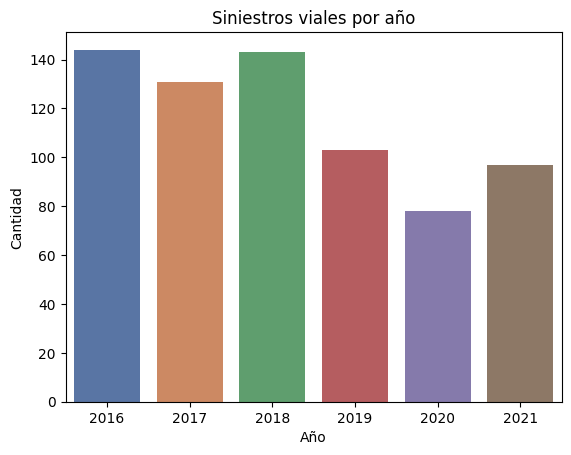

In [192]:
df = hechos[['Año', 'Id']].groupby('Año').count().reset_index()

plt.figure()
sns.barplot(data=df, x='Año', y='Id', palette='deep')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Siniestros viales por año')
plt.show()

### Las victimas de los eventos ¿Son hombre o mujeres?

En el conteo general, con respecto a muertes en siniestros viales, alrededor del 75% son hombres

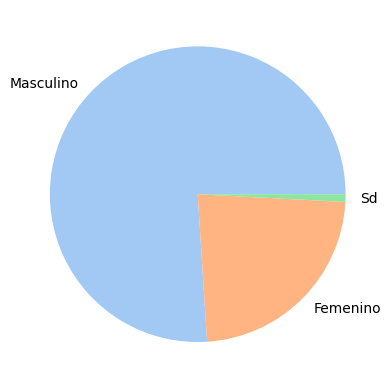

In [172]:
victimas['Sexo'].value_counts()

plt.figure()
color = sns.color_palette('pastel')
plt.pie(victimas['Sexo'].value_counts(), labels=victimas['Sexo'].value_counts().index, colors=color)
plt.show()

Distribución por año

In [60]:
victimas[['Año','Sexo', 'Id']].groupby(['Año', 'Sexo']).count()

Id
Año  Sexo          
2016 Femenino    27
     Masculino  113
     Sd           6
2017 Femenino    36
     Masculino  104
2018 Femenino    38
     Masculino  111
2019 Femenino    27
     Masculino   77
2020 Femenino    16
     Masculino   65
2021 Femenino    22
     Masculino   75

<function matplotlib.pyplot.show(close=None, block=None)>

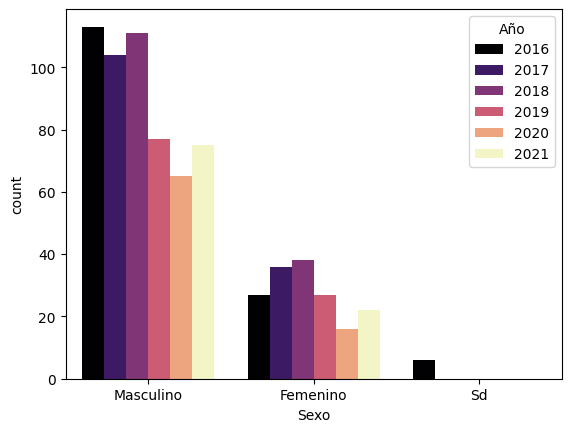

In [56]:
plt.figure()
sns.countplot(data=victimas ,x='Sexo', hue='Año', palette='magma')
plt.show

### ¿En que tipo de calle ocurren la mayoría de los accidentes? ¿En cuales calles es más frecuente?

Observamos que la mayor cantidad de muertes por siniestros viales se producen en avenidas, principalmente en la Av. Gral Paz

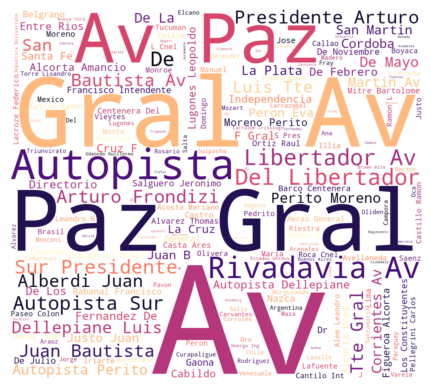

In [191]:
from wordcloud import WordCloud
wc = WordCloud(width=1024, height=920,background_color='white', colormap='magma').generate(hechos['Calle'].to_string())
plt.axis('off')
plt.imshow(wc, interpolation = "bilinear")
plt.show()

In [175]:
hechos['Tipo_calle'].value_counts()

Tipo_calle
Avenida      494
Calle        136
Autopista     66
Name: count, dtype: int64

In [176]:
hechos['Calle'].value_counts()

Calle
Paz, Gral. Av.                                57
Rivadavia Av.                                 19
Del Libertador Av.                            18
Autopista 1 Sur Presidente Arturo Frondizi    14
Alberdi, Juan Bautista Av.                    13
                                              ..
Pilcomayo                                      1
Cervantes                                      1
Congreso Av.                                   1
Australia Av.                                  1
Padre Carlos Mujica                            1
Name: count, Length: 280, dtype: int64

### La mayoria de los siniestro ¿Ocurren en cruces?

A su vez observamos que la mayoría de los accidentes suceden en cruces, por lo que podemos considerar la implementación de semaforos para reducir la cantidad de accidentes. Podemos notar que en el cruce de Escalada y 27 de Febrero hubieron varios accidentes, por lo que procedemos a buscar algun lugar de hecho donde hay accidentes recurrentes

In [179]:
hechos.replace("", "Sin cruce", inplace=True)
hechos['Cruce'].value_counts()[:12]

Cruce
Sin cruce                              171
Paz, Gral. Av.                          14
Escalada Av.                             9
Rivadavia Av.                            8
Independencia Av.                        7
Pueyrredon Av.                           6
Balbin, Ricardo, Dr. Av.                 6
Del Libertador Av.                       6
Roca, Cnel. Av.                          5
Rivera Indarte Av.                       5
9 De Julio Av.                           5
Fernandez De La Cruz, F., Gral. Av.      5
Name: count, dtype: int64

In [180]:
hechos['Cruce'].replace("Sin cruce", pd.NA).isna().value_counts()

Cruce
False    525
True     171
Name: count, dtype: int64

In [46]:
hechos[(hechos['Cruce'] == 'Paz, Gral. Av.')]

,Id,Id_hecho,N_victimas,Fecha,Año,Mes,Dia,Hora,Lugar_hecho,Tipo_calle,Calle,Cruce,Comuna,Longitud,Latitud,Participantes,Victima,Acusado
40,41,2016-0054,1,2016-04-23,2016,4,23,21,Au Luis Dellepiane Y Av Gral Paz,Autopista,Autopista Dellepiane Luis Tte. Gral.,"Paz, Gral. Av.",8,-58.486954,-34.687952,Moto-Moto,Moto,Moto\r
74,75,2016-0099,1,2016-07-29,2016,7,29,16,Av Gral Mosconi Y Av Gral Paz,Avenida,Mosconi General Av.,"Paz, Gral. Av.",11,-58.523406,-34.597988,Cargas-Cargas,Cargas,Cargas\r
215,216,2017-0090,1,2017-07-15,2017,7,15,5,Av. Chivilcoy Y Colectora Av. Gral. Paz,Avenida,Chivilcoy Av.,"Paz, Gral. Av.",11,-58.519256,-34.591717,Peaton-Auto,Peaton,Auto\r
216,217,2017-0091,1,2017-07-15,2017,7,15,13,Superi Y Av. Gral. Paz,Avenida,Superi,"Paz, Gral. Av.",12,-58.486715,-34.543212,Moto-Sd,Moto,Sd\r
259,260,2017-0144,1,2017-11-26,2017,11,26,6,Av. Cnel. Roca Y Colectora Av. Gral. Paz,Avenida,"Roca, Cnel. Av.","Paz, Gral. Av.",8,-58.470646,-34.698438,Auto-Objeto Fijo,Auto,Objeto Fijo\r
271,272,2017-0158,1,2017-12-18,2017,12,18,21,Gualeguaychu Y Colectora Av. Gral Paz,Avenida,Gualeguaychu,"Paz, Gral. Av.",11,-58.520375,-34.594070,Moto-Auto,Moto,Auto\r
350,351,2018-0076,1,2018-07-16,2018,7,16,9,"Chavez, Jorge Y Paz, Gral. Av.",Calle,"Chavez, Jorge","Paz, Gral. Av.",9,-58.529329,-34.650150,Auto-Cargas,Auto,Cargas\r
353,354,2018-0079,1,2018-07-23,2018,7,23,7,"De Los Corrales Av. Y Paz, Gral. Av.",Avenida,De Los Corrales Av.,"Paz, Gral. Av.",9,-58.508775,-34.669777,Peaton-Cargas,Peaton,Cargas\r
389,390,2018-0115,1,2018-10-31,2018,10,31,12,"Bosch, Ventura Y Paz, Gral. Av.",Calle,"Bosch, Ventura","Paz, Gral. Av.",9,-58.528878,-34.642979,Peaton-Pasajeros,Peaton,Pasajeros\r
443,444,2019-0026,1,2019-03-28,2019,3,28,7,"Fernandez De La Cruz, F. , Gral. Av. Y Larrazabal",Avenida,"Fernandez De La Cruz, F., Gral. Av.","Paz, Gral. Av.",8,-58.479768,-34.691532,Peaton-Pasajeros,Peaton,Pasajeros\r


In [47]:
hechos[(hechos['Cruce'] == 'Escalada Av.')]

,Id,Id_hecho,N_victimas,Fecha,Año,Mes,Dia,Hora,Lugar_hecho,Tipo_calle,Calle,Cruce,Comuna,Longitud,Latitud,Participantes,Victima,Acusado
5,6,2016-0008,1,2016-01-24,2016,1,24,18,Av 27 De Febrero Y Av Escalada,Avenida,27 De Febrero Av.,Escalada Av.,8,-58.444513,-34.684759,Moto-Objeto Fijo,Moto,Objeto Fijo\r
89,90,2016-0116,1,2016-09-02,2016,9,2,20,Av 27 De Febrero Y Av Escalada,Avenida,27 De Febrero Av.,Escalada Av.,8,-58.444513,-34.684759,Moto-Auto,Moto,Auto\r
112,113,2016-0143,1,2016-11-06,2016,11,6,4,Av 27 De Febrero Y Av Escalada,Avenida,27 De Febrero Av.,Escalada Av.,8,-58.444513,-34.684759,Moto-Sd,Moto,Sd\r
126,127,2016-0159,1,2016-12-04,2016,12,4,7,Av 27 De Febrero Y Av Escalada,Avenida,27 De Febrero Av.,Escalada Av.,8,-58.444513,-34.684759,Auto-Sd,Auto,Sd\r
206,207,2017-0080,1,2017-06-22,2017,6,22,10,Av. Juan B Alberdi Y Av. Escalada,Avenida,"Alberdi, Juan Bautista Av.",Escalada Av.,9,-58.495253,-34.644878,Peaton-Cargas,Peaton,Cargas\r
240,241,2017-0120,1,2017-10-02,2017,10,2,15,Au Dellepiane Y Av. Escalada,Autopista,Autopista Dellepiane Luis Tte. Gral.,Escalada Av.,9,-58.472975,-34.662451,Moto-Cargas,Moto,Cargas\r
255,256,2017-0139,1,2017-11-19,2017,11,19,22,Av. Cnel. Roca Y Av. Escalada,Avenida,"Roca, Cnel. Av.",Escalada Av.,8,-58.450641,-34.680036,Auto-Objeto Fijo,Auto,Objeto Fijo\r
542,543,2020-0022,1,2020-04-07,2020,4,7,6,"Dellepiane, Luis, Tte. Gral. Y Escalada Av.",Autopista,Autopista Dellepiane Luis Tte. Gral.,Escalada Av.,9,-58.472975,-34.662451,Auto-Cargas,Auto,Cargas\r
592,593,2020-0073,1,2020-12-20,2020,12,20,7,27 De Febrero Av. Y Escalada Av.,Avenida,27 De Febrero Av.,Escalada Av.,8,-58.444513,-34.684759,Moto-Objeto Fijo,Moto,Objeto Fijo\r


In [49]:
hechos['Lugar_hecho'].value_counts()[:5]

Lugar_hecho
Av 27 De Febrero Y Av Escalada            4
Cantilo, Int. Y Udaondo, Guillermo Av.    2
Cordoba Av. Y Madero, Eduardo Av.         2
Av La Plata Y Cnel Gregorio Pomar         2
Paz, Gral. Av. Y Del Libertador Av.       2
Name: count, dtype: int64

### ¿En que comuna ocurren mas siniestros fatales?

Observamos que en las comunas donde más siniestro ocurren son en la 1, 4, 9, 8 y 7. A continuación, la informacion de como está integrada cada comuna.
1 -> Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución.
4 -> La Boca, Barracas, Parque Patricios y Nueva Pompeya.
9 -> Liniers, Mataderos y Parque Avellaneda.
8 -> Villa Soldati, Villa Riachuelo, Villa Lugano.
7 -> Flores y Parque Chacabuco.

Es decir principalmente **zona sur** de caba

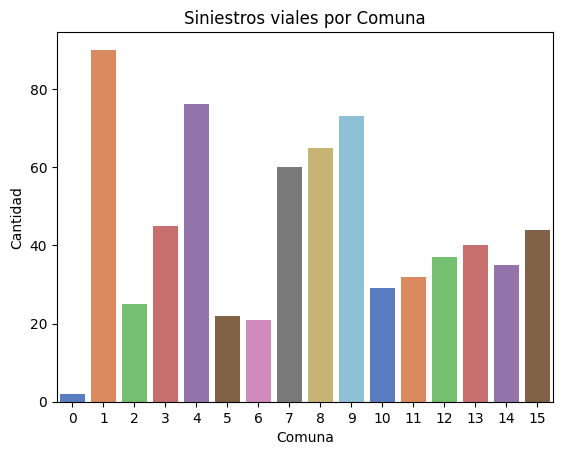

In [190]:
df = hechos[['Comuna', 'Id']].groupby(['Comuna']).count().reset_index()

plt.figure()
sns.barplot(data=df, x='Comuna', y='Id', palette='muted')
plt.xlabel('Comuna')
plt.ylabel('Cantidad')
plt.title('Siniestros viales por Comuna')
plt.show()

In [182]:
df.sort_values(by='Id', ascending=False).head(5)

,Comuna,Id
1,1,90
4,4,76
9,9,73
8,8,65
7,7,60


### ¿En que horarios sucede la mayor cantidad de siniestros?

Observamos que el grueso de los accidentes suceden entre las 5 y 10am. Horarios que coinciden con la hora pico entre semana debido al traslado de la gente hacia el trabajo, y el cierre de los boliches, bares y símiles con respecto al fin de semana.

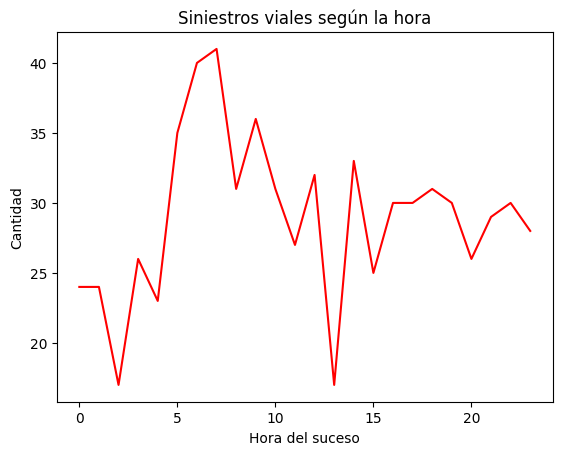

In [183]:
df = hechos[['Hora', 'Id']].groupby('Hora').count().reset_index()

plt.figure()
sns.lineplot(data= df, x='Hora', y= 'Id', color='r')
plt.xlabel('Hora del suceso')
plt.ylabel('Cantidad')
plt.title('Siniestros viales según la hora')
plt.xticks()
plt.show()

### ¿En que meses ocurren más siniestros viales?

La distribución es relativamente normal, aunque se puede ver que a fin de año gráfica alcanza un pico. Esto se puede deber a las festividades de fin de año.

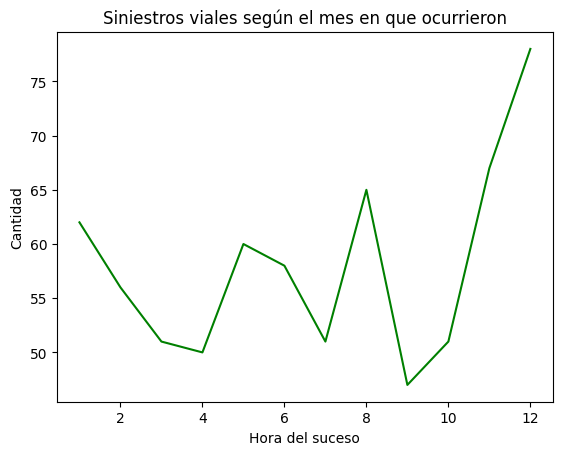

In [206]:
df = hechos[['Mes', 'Id']].groupby('Mes').count().reset_index()
x = df['Mes']
y = df['Id']

plt.figure()
sns.lineplot(data=df, x='Mes', y='Id', color='g')
plt.xlabel('Hora del suceso')
plt.ylabel('Cantidad')
plt.title('Siniestros viales según el mes en que ocurrieron')
plt.xticks()
plt.show()

### ¿Que tipo de vehiculo es el principal protagonista en los accidentes?

Los autos son los principales causantes de siniestros. Luego se encuentran los pasajeros de transporte público, ya sea desde dentro, ascendiendo o descendiendo desde el mismo. En tercer lugar vemos los vehiculos de carga

In [185]:
hechos['Acusado'] = hechos['Acusado'].apply(lambda x: x.strip())
hechos['Acusado'].value_counts()

Acusado
Auto           204
Pasajeros      173
Cargas         146
Objeto Fijo     62
Moto            57
Sd              23
Multiple        17
Bicicleta        7
Otro             6
Tren             1
Name: count, dtype: int64

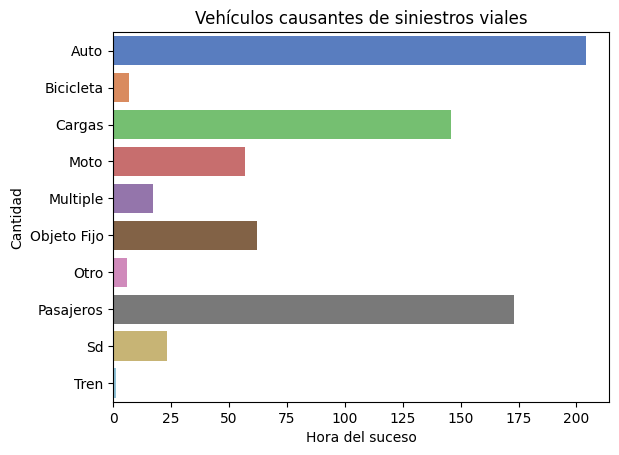

In [224]:
df = hechos[['Acusado', 'Id']].groupby('Acusado').count().reset_index()

plt.figure()
sns.barplot(data=df, x='Id', y='Acusado', palette='muted')
plt.xlabel('Hora del suceso')
plt.ylabel('Cantidad')
plt.title('Vehículos causantes de siniestros viales')
plt.xticks()
plt.show()

### ¿Cuales son las principales víctimas en los siniestros viales?

Las principales víctimas son las motos y los peatones por amplia diferencia. Vemos tambien que de los 57 accidentes en la Gral Paz, en 32 las victimas fueron motociclistas, es decir alrededor del 75%, y en Autopista 41 de 66 casos, un 64%.

Con respecto a los peatones, casi en la totalidad de los casos en la Av. Rivadavia ellos fueron las victimas

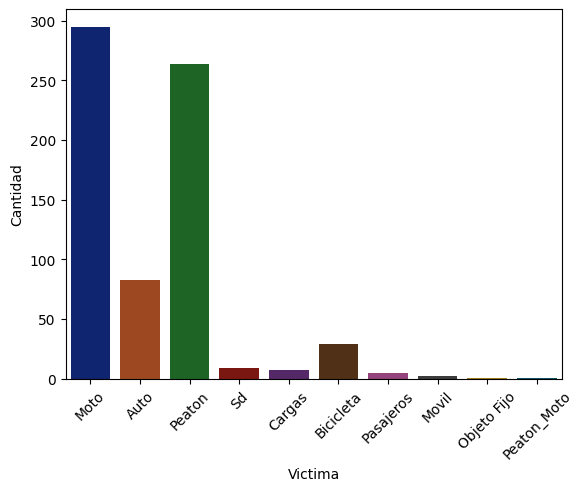

In [226]:
plt.figure()
sns.countplot(data=hechos, x='Victima', palette='dark')
plt.ylabel('Cantidad')

plt.xticks(rotation=45)
plt.show()

In [62]:
hechos['Calle'][(hechos['Victima'] == 'Moto')].value_counts()

Calle
Paz, Gral. Av.                                32
Autopista 1 Sur Presidente Arturo Frondizi    12
Del Libertador Av.                             9
Autopista Perito Moreno                        7
Autopista 25 De Mayo                           7
                                              ..
Oliden                                         1
Cervantes                                      1
Pilcomayo                                      1
Gualeguaychu                                   1
Dellepiane, Luis, Tte. Gral.                   1
Name: count, Length: 158, dtype: int64

In [63]:
hechos['Tipo_calle'][(hechos['Victima'] == 'Moto')].value_counts()

Tipo_calle
Avenida      204
Calle         50
Autopista     41
Name: count, dtype: int64

In [64]:
hechos['Calle'][(hechos['Victima'] == 'Peaton')].value_counts()

Calle
Rivadavia Av.                           17
Paz, Gral. Av.                           8
Alberdi, Juan Bautista Av.               7
Corrientes Av.                           6
Santa Fe Av.                             6
                                        ..
Alvarez Thomas Av.                       1
Las Heras General Av.                    1
Ciudadela                                1
Autopista Dellepiane Luis Tte. Gral.     1
Esmeralda                                1
Name: count, Length: 146, dtype: int64

In [66]:
hechos['Tipo_calle'][(hechos['Victima'] == 'Peaton')].value_counts()

Tipo_calle
Avenida      195
Calle         58
Autopista     11
Name: count, dtype: int64

### ¿Entre que edades se encuentran las victimas de los siniestro?

La mayoria de las victimas rondan entre los 20 y 40 años. También hay gran cantidad de registros faltantes con respecto a la edad

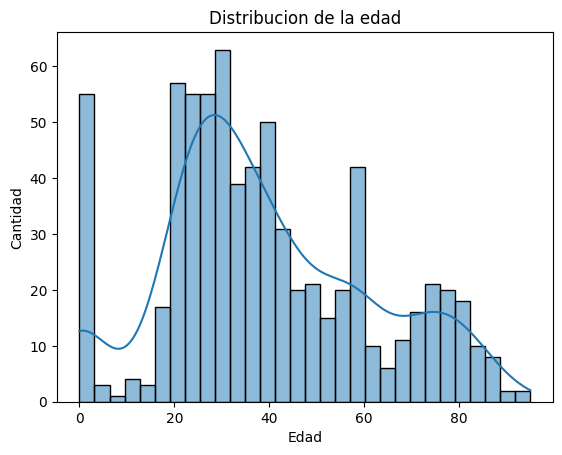

In [225]:
plt.figure()
sns.histplot(data=victimas, x='Edad', bins=30, kde=True, palette='deep')
plt.title('Distribucion de la edad')
plt.ylabel('Cantidad')
plt.show()

In [212]:
victimas

,Id,Id_hecho,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_fallecimiento
0,1,2016-0001,2016-01-01,2016,1,1,Conductor,Moto,Masculino,19,2016-01-01
1,2,2016-0002,2016-01-02,2016,1,2,Conductor,Auto,Masculino,70,2016-01-02
2,3,2016-0003,2016-01-03,2016,1,3,Conductor,Moto,Masculino,30,2016-01-03
3,4,2016-0004,2016-01-10,2016,1,10,Conductor,Moto,Masculino,18,None
4,5,2016-0005,2016-01-21,2016,1,21,Conductor,Moto,Masculino,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...
712,713,2021-0092,2021-12-12,2021,12,12,Peaton,Peaton,Femenino,50,2021-12-12
713,714,2021-0093,2021-12-13,2021,12,13,Pasajero_Acompañante,Moto,Femenino,18,2021-12-18
714,715,2021-0094,2021-12-20,2021,12,20,Pasajero_Acompañante,Moto,Femenino,43,2021-12-20
715,716,2021-0095,2021-12-30,2021,12,30,Conductor,Moto,Masculino,27,2022-01-02


In [223]:
hechos

,Id,Id_hecho,N_victimas,Fecha,Año,Mes,Dia,Hora,Lugar_hecho,Tipo_calle,Calle,Cruce,Comuna,Longitud,Latitud,Participantes,Victima,Acusado
0,1,2016-0001,1,2016-01-01,2016,1,1,4,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,Piedra Buena Av.,"Fernandez De La Cruz, F., Gral. Av.",8,-58.475340,-34.687570,Moto-Auto,Moto,Auto
1,2,2016-0002,1,2016-01-02,2016,1,2,1,Av Gral Paz Y Av De Los Corrales,Avenida,"Paz, Gral. Av.",De Los Corrales Av.,9,-58.508775,-34.669777,Auto-Pasajeros,Auto,Pasajeros
2,3,2016-0003,1,2016-01-03,2016,1,3,7,Av Entre Rios 2034,Avenida,Entre Rios Av.,Sin cruce,1,-58.390403,-34.631894,Moto-Auto,Moto,Auto
3,4,2016-0004,1,2016-01-10,2016,1,10,0,Av Larrazabal Y Gral Villegas Conrado,Avenida,Larrazabal Av.,"Villegas, Conrado, Gral.",8,-58.465039,-34.680930,Moto-Sd,Moto,Sd
4,5,2016-0005,1,2016-01-21,2016,1,21,5,Av San Juan Y Presidente Luis Saenz Peña,Avenida,San Juan Av.,"Saenz Pe?A, Luis, Pres.",1,-58.387183,-34.622466,Moto-Pasajeros,Moto,Pasajeros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,692,2021-0093,1,2021-12-13,2021,12,13,17,Av. Riestra Y Mom,Avenida,Riestra Av.,Mom,7,-58.433538,-34.645616,Moto-Auto,Moto,Auto
692,693,2021-0094,1,2021-12-20,2021,12,20,1,Au Dellepiane Y Lacarra,Autopista,"Dellepiane, Luis, Tte. Gral.",Lacarra Av.,9,-58.467398,-34.651178,Moto-Auto,Moto,Auto
693,694,2021-0095,1,2021-12-30,2021,12,30,0,Av. Gaona Y Terrada,Avenida,Gaona Av.,Terrada,11,-58.472934,-34.619847,Moto-Cargas,Moto,Cargas
694,695,2021-0096,1,2021-12-15,2021,12,15,10,Av. Eva Peron 4071,Avenida,"Peron, Eva Av.",Sin cruce,9,-58.470668,-34.650217,Auto-Cargas,Auto,Cargas


Efectuamos los siguientes cambios en SQL

#Rellenar los 0 en columna Edad con el promedio

#Reemplazar "" por sin cruce en Cruce

#Rellenar las coordenadas en 0 por el promedio para el mapa

Obtenemos los barrios que conforman las comunas

In [38]:
comunas = pd.read_csv('comunas.csv', sep=';')
comunas.drop(columns=['WKT', 'ID', 'OBJETO', 'PERIMETRO', 'AREA'], inplace=True)
comunas['COMUNAS'] = comunas['COMUNAS'].astype('int')
comunas['BARRIOS'] = comunas['BARRIOS'].apply(lambda x: x.split('-'))
comunas

,COMUNAS,BARRIOS
0,2,[RECOLETA]
1,6,[CABALLITO]
2,10,"[FLORESTA , MONTE CASTRO , VELEZ SARSFIELD ,..."
3,11,"[VILLA DEL PARQUE , VILLA DEVOTO , VILLA GR..."
4,12,"[COGHLAN , SAAVEDRA , VILLA PUEYRREDON , VI..."
5,14,[PALERMO]
6,15,"[AGRONOMIA , CHACARITA , PARQUE CHAS , PA..."
7,13,"[BELGRANO , COLEGIALES , NUÑEZ]"
8,4,"[BARRACAS , BOCA , NUEVA POMPEYA , PARQUE P..."
9,5,"[ALMAGRO , BOEDO]"


In [39]:
comunas = comunas.explode('BARRIOS')
comunas.rename(columns={'COMUNAS':'Comuna', 'BARRIOS':'Barrio'}, inplace=True)

In [40]:
comunas['Ciudad'] = 'CABA'
comunas['Pais'] = 'Argentina'

In [41]:
comunas

,Comuna,Barrio,Ciudad,Pais
0,2,RECOLETA,CABA,Argentina
1,6,CABALLITO,CABA,Argentina
2,10,FLORESTA,CABA,Argentina
2,10,MONTE CASTRO,CABA,Argentina
2,10,VELEZ SARSFIELD,CABA,Argentina
2,10,VERSALLES,CABA,Argentina
2,10,VILLA LURO,CABA,Argentina
2,10,VILLA REAL,CABA,Argentina
3,11,VILLA DEL PARQUE,CABA,Argentina
3,11,VILLA DEVOTO,CABA,Argentina


In [42]:
comunas.to_csv('comuna.csv')